<h1><b>importing the libraries</b></h1>

In [16]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<h1><b>data exploration</b></h1>

In [2]:
data = pd.read_csv('bank-full.csv',sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
y = data['y']
data.drop(['y'],axis = 1,inplace=True)

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


<h1><b>Encoding the categorical Variables</b></h1>

In [8]:
col_obj = [col for col in data.columns if data[col].dtype == "object"]

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [10]:
# Columns that can be safely ordinal encoded
good_label_cols = [col for col in col_obj if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(col_obj)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Categorical columns that will be dropped from the dataset: []


In [11]:
ordinal_encoder = OrdinalEncoder()

label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)


label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

In [12]:
label_X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13932,57,0.0,0.0,1.0,0.0,658,0.0,0.0,0.0,10,5.0,724,1,-1,0,3.0
9894,37,11.0,1.0,3.0,0.0,1699,0.0,0.0,2.0,9,6.0,63,1,-1,0,3.0
39946,35,9.0,0.0,1.0,0.0,2823,1.0,0.0,0.0,2,6.0,102,4,96,2,0.0
9217,35,0.0,1.0,1.0,0.0,214,1.0,1.0,2.0,5,6.0,247,1,-1,0,3.0
4124,38,7.0,2.0,2.0,0.0,323,1.0,0.0,2.0,19,8.0,138,1,-1,0,3.0


<h1><b>creating and evaluating the model</b></h1>

In [13]:
def get_score(n_estimators):

    clf = RandomForestClassifier(n_estimators, random_state=42)
    clf.fit(label_X_train, y_train)
    y_pred = clf.predict(label_X_valid)
    return accuracy_score(y_valid, y_pred)

In [14]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

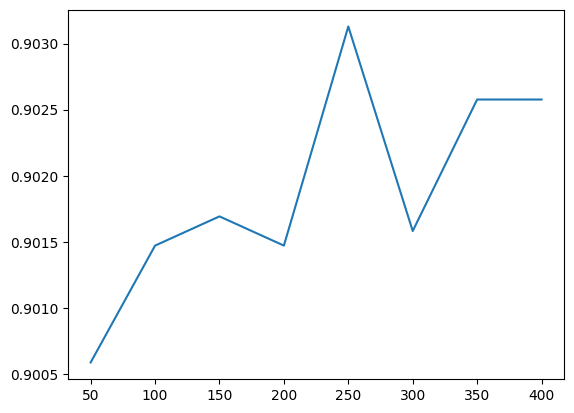

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [17]:
clf = RandomForestClassifier(250, random_state=42)
clf.fit(label_X_train, y_train)
print(classification_report(y_valid, clf.predict(label_X_valid)))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7980
         yes       0.63      0.44      0.51      1063

    accuracy                           0.90      9043
   macro avg       0.78      0.70      0.73      9043
weighted avg       0.89      0.90      0.90      9043

